<a href="https://colab.research.google.com/github/jorge-pichardo07/EDP1/blob/main/Tarea__M%C3%ADnimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [95]:
#Definimos alfa como ai
x, a0, a1, a2, a3 = sp.symbols('x a0 a1 a2 a3')

u_N = a0 + a1*x + a2*x**2 + a3*x**3


In [96]:
# Condiciones iniciales
# u(0) = 0
cond1 = sp.Eq(u_N.subs(x, 0), 0)
# u'(0) = 2
u_N_prime = sp.diff(u_N, x)
cond2 = sp.Eq(u_N_prime.subs(x, 0), 2)

In [97]:
# Resolver para a0 y a1
sol_init = sp.solve([cond1, cond2], [a0, a1])


In [98]:
# Sustituir en u_N
u_N_subs = u_N.subs(sol_init)

In [99]:
# Calculamos E = u_N'' + u_N - x
u_N_double_prime = sp.diff(u_N_subs, x, 2)
E = sp.simplify(u_N_double_prime + u_N_subs - x)

In [100]:
I = sp.integrate(E**2, (x, 0, 1))

In [101]:
# Derivadas parciales con respecto a a2 y a3
dIda2 = sp.diff(I, a2)
dIda3 = sp.diff(I, a3)

In [102]:
#Resolver el sistema de ecuaciones
sol_resultados = sp.solve([sp.Eq(dIda2, 0), sp.Eq(dIda3, 0)], [a2, a3])

In [103]:
sol_resultados

{a2: -1335/86789, a3: -24759/173578}

In [104]:
# Solución aproximada final por mínimos cuadrados
u_approx_mcq = u_N_subs.subs(sol_resultados)

In [105]:
#Solución exacta
u = sp.Function('u')
ode_exact = sp.Eq(u(x).diff(x, 2) + u(x), x)
sol_exact = sp.dsolve(ode_exact, ics={u(0): 0, sp.diff(u(x), x).subs(x, 0): 2})

In [106]:

# En el ejercicio 5.1 usamos colocación en x=1/2 y x=1
puntos = [sp.Rational(1, 2), 1]

# Resolver para α2 y α3 por colocación
eq1_col = sp.Eq(E.subs(x, puntos[0]), 0)
eq2_col = sp.Eq(E.subs(x, puntos[1]), 0)

sol_col = sp.solve([eq1_col, eq2_col], [a2, a3])
u_approx_col = u_N_subs.subs(sol_col)

In [107]:
# Convertimos a funciones numéricas
u_mcq_func = sp.lambdify(x, u_approx_mcq, "numpy")
u_col_func = sp.lambdify(x, u_approx_col, "numpy")
u_exact_func = sp.lambdify(x, sol_exact.rhs, "numpy")

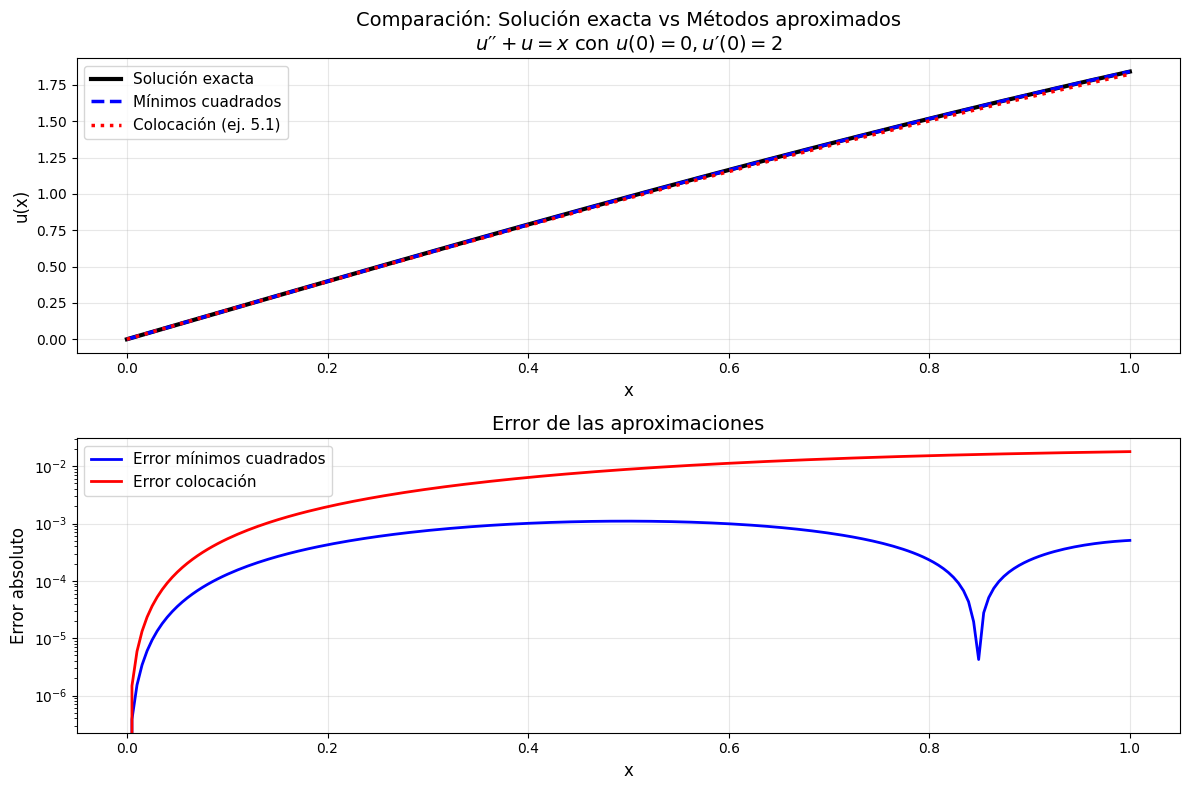

In [108]:
# --- Graficar comparación ---
x_vals = np.linspace(0, 1, 200)
u_mcq_vals = u_mcq_func(x_vals)
u_col_vals = u_col_func(x_vals)
u_exact_vals = u_exact_func(x_vals)

plt.figure(figsize=(12, 8))

# Gráfica principal
plt.subplot(2, 1, 1)
plt.plot(x_vals, u_exact_vals, 'k-', label='Solución exacta', linewidth=3)
plt.plot(x_vals, u_mcq_vals, 'b--', label='Mínimos cuadrados', linewidth=2.5)
plt.plot(x_vals, u_col_vals, 'r:', label='Colocación (ej. 5.1)', linewidth=2.5)

plt.xlabel('x', fontsize=12)
plt.ylabel('u(x)', fontsize=12)
plt.title('Comparación: Solución exacta vs Métodos aproximados\n$u′′ + u = x$ con $u(0)=0, u′(0)=2$', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()

# Gráfica de errores
plt.subplot(2, 1, 2)
error_mcq = np.abs(u_mcq_vals - u_exact_vals)
error_col = np.abs(u_col_vals - u_exact_vals)

plt.plot(x_vals, error_mcq, 'b-', label='Error mínimos cuadrados', linewidth=2)
plt.plot(x_vals, error_col, 'r-', label='Error colocación', linewidth=2)

plt.xlabel('x', fontsize=12)
plt.ylabel('Error absoluto', fontsize=12)
plt.title('Error de las aproximaciones', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.tight_layout()

plt.show()




In [109]:
#  Calcular errores cuadráticos medios
# Error cuadrático medio para mínimos cuadrados
error_sq_mcq = sp.integrate((u_approx_mcq - sol_exact.rhs)**2, (x, 0, 1))
error_sq_col = sp.integrate((u_approx_col - sol_exact.rhs)**2, (x, 0, 1))

print("COMPARACIÓN CUANTITATIVA (en intervalo [0, 1]):")
print(f"Error cuadrático medio - Mínimos cuadrados: {float(error_sq_mcq):.6e}")
print(f"Error cuadrático medio - Colocación: {float(error_sq_col):.6e}")

#  Calcular residuales en algunos puntos

print("RESIDUALES E(x) = u'' + u - x en algunos puntos:")


# Calcular residuales para ambos métodos
epsilon_mcq = sp.diff(u_approx_mcq, x, 2) + u_approx_mcq - x
epsilon_col = sp.diff(u_approx_col, x, 2) + u_approx_col - x

sample_points = [0, 0.25, 0.5, 0.75, 1.0]
for point in sample_points:
    eps_mcq_val = float(epsilon_mcq.subs(x, point))
    eps_col_val = float(epsilon_col.subs(x, point))
    print(f"x = {point:.2f}:")
    print(f"  Mínimos cuadrados: E{point:.2f}) = {eps_mcq_val:.6e}")
    print(f"  Colocación:        E({point:.2f}) = {eps_col_val:.6e}")
    print()

COMPARACIÓN CUANTITATIVA (en intervalo [0, 1]):
Error cuadrático medio - Mínimos cuadrados: 4.667093e-07
Error cuadrático medio - Colocación: 1.114239e-04
RESIDUALES E(x) = u'' + u - x en algunos puntos:
x = 0.00:
  Mínimos cuadrados: E0.00) = -3.076427e-02
  Colocación:        E(0.00) = -1.176471e-01

x = 0.25:
  Mínimos cuadrados: E0.25) = 2.087048e-03
  Colocación:        E(0.25) = -4.963235e-02

x = 0.50:
  Mínimos cuadrados: E0.50) = 1.964319e-02
  Colocación:        E(0.50) = 3.469447e-18

x = 0.75:
  Mínimos cuadrados: E0.75) = 8.531737e-03
  Colocación:        E(0.75) = 2.022059e-02

x = 1.00:
  Mínimos cuadrados: E1.00) = -4.461971e-02
  Colocación:        E(1.00) = 1.387779e-17

